In [8]:
# Importando as bibliotecas necessárias:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Importando biblioteca para plotagem em 3D
from matplotlib import cm 

# Usando função mágica para plotagem
%matplotlib inline

In [9]:
# Importando as FEATURES e o TARGET
df = pd.read_csv('non_linear_reg.csv', header=None)

# Definindo o valor de f0:
f0 = 1000 

# Definindo o número de amostras:
M = len(df[0].to_numpy())

# Definindo as ENTRADAS (features):
x  = (df[0].to_numpy()).reshape(M,1)

# Defindo o TARGET (saída):
y = (df[1].to_numpy()).reshape(M,1)

In [10]:
# Definindo o tamanho do conjunto de treinamento:
v_size = 0.7

# Segregação dos dados para validação e treinamento:
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=v_size)

In [16]:
# Criando a SUPERFÍCIE DE ERRO:

# Definindo o número de iterações:
N = 400

# Definindo valores lINEARMENTE espaçados para os PESOS
a1 = np.linspace(-10.0, 10.0, N)
a2 = np.linspace(-10.0, 10.0, N)

# Criação da malha para plotagem gráfica
A1, A2 = np.meshgrid(a1, a2)

# Criando o vetor para armazenamento dos valores de ERRO:
J =np.zeros((N, N))

#LOOP:
for iter1 in range(0, N):
    for iter2 in range(0, N):
        y_hat =  A1[iter1][iter2] * math.cos(2 * 3.14 * f0 * x[iter1]) + A1[iter1][iter2] * math.cos(3 * 3.14 * f0 * x[iter1])
        J[iter1][iter2] = (1.0/M)*np.sum(np.square(y - y_hat))

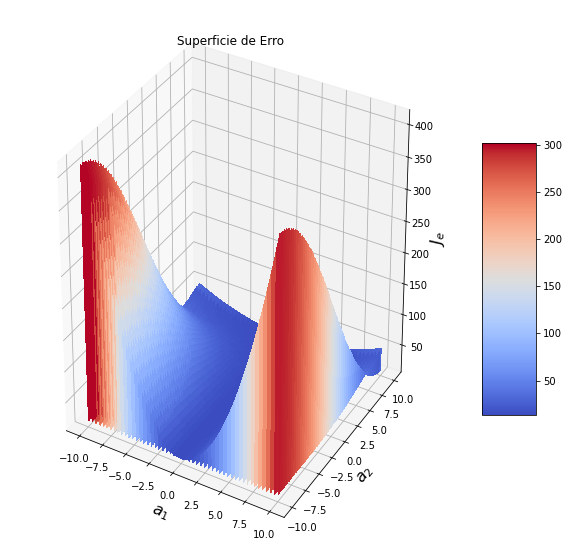

In [17]:
# Plotando o gráfico da SUPERFÍCIE DE ERRO:

fig = plt.figure(figsize=(10, 10))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(A1, A2, J, cmap=cm.coolwarm, linewidth=0, 
                       antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('$a_1$', fontsize=16)
ax.set_ylabel('$a_2$', fontsize=16)
ax.set_zlabel('$J_e$', fontsize=16);
plt.title('Superficie de Erro')
plt.show()

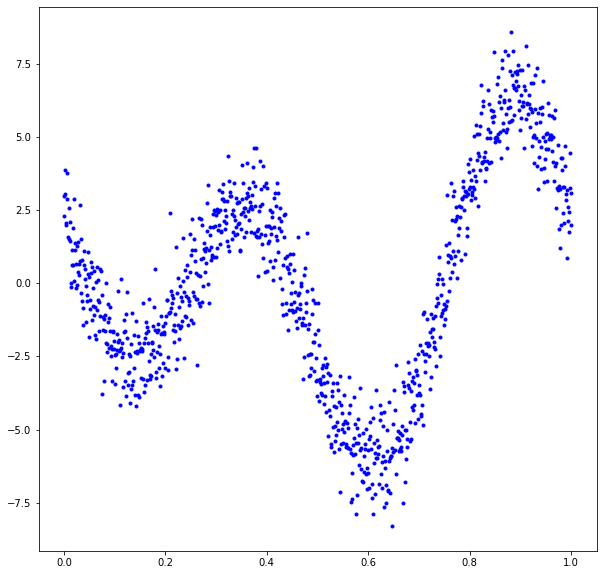

In [13]:
# Plotando a figura:

fig = plt.figure(figsize=(10, 10))
plt.plot(x, y, 'b.')
plt.show()

In [60]:
# Concatenando os valores:
X = np.c_[x, x]

# Executando a formula fechada:
for i in range(0, M):
    a_opt = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    y_hat = a_opt[0, 0] * math.cos(2 * 3.14 * f0 * x[i]) + a_opt[1, 0] * math.cos(3 * 3.14 * f0 * x[i])
    j_opt = (1/M)*np.sum(np.power((y - y_hat), 2))

In [61]:
# Imprimindo os valores encontrados pela FORMULA:
print('O a0 ótimo encontrado pela formula fechada é: {}'.format(a_opt[0, 0]))
print('O a1 ótimo encontrado pela formula fechada é: {}'.format(a_opt[1, 0]))

O a0 ótimo encontrado pela formula fechada é: 0.5379502630291799
O a1 ótimo encontrado pela formula fechada é: 0.5379502630291799


In [97]:
iter = len(y_train)

# Definindo o passo de aprendizagem: 
alpha = 0.010

# Criando a matriz de pesos finais para armazenamento:
a = np.zeros((2, 1))

# Definindo os pesos iniciais:
a[0, 0] = -10
a[1, 0] = -10

# Criando a matriz HISTÓRICA dos pesos:
a_hist = np.zeros((2, iter+1))

# Criando a matriz de ERROS:
jgd = np.zeros(iter+1)

# Definindo o valor INICIAL do erro:
jgd[0] = (1.0/M)*sum(np.power(y - X.dot(a), 2))

In [98]:
# Definindo o inicio das iterações:
iteration = 0

# Criando a matriz de GRADIENTES HISTÓRICOS:
grad_hist = np.zeros((2, iter))

In [99]:
# lOOP do gradiente:
while iteration < iter:
    
    gradients = -(2.0/M)*X.T.dot(y - y_hat)
    
    grad_hist[0, iteration] = gradients[0, 0]
    grad_hist[1, iteration] = gradients[1, 0]
    
    a = a - alpha * gradients
    
    a_hist[0, iteration+1] = a[0,0]
    a_hist[1, iteration+1] = a[1,0]
    
    y_hat = a_opt[0, 0] * math.cos(2 * 3.14 * f0 * x[i]) + a_opt[1, 0] * math.cos(3 * 3.14 * f0 * x[i])
    
    jgd[iteration+1] = (1.0/M)*sum(np.power( (y - y_hat) , 2))
    
    iteration += 1

In [100]:
# Imprimindo os valores encontrados pelo GRADIENTE:
print('O valor de a0 ótimo encontrado pelo gradiente é: {}'.format(a[0, 0]))
print('O valor de a1 ótimo encontrado pelo gradiente é: {}'.format(a[1, 0]))

O valor de a0 ótimo encontrado pelo gradiente é: -6.340560203567804
O valor de a1 ótimo encontrado pelo gradiente é: -6.340560203567804


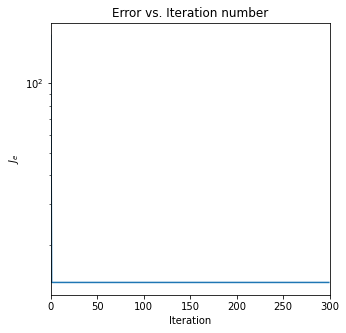

In [101]:
# Plotando o gráfico do ERRO vs NÚMERO DE ITERAÇÕES:

fig = plt.figure(figsize=(5,5))
plt.plot(np.arange(0, iteration), jgd[0:iteration])
plt.xlim((0, iteration))
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('$J_e$')
plt.title('Error vs. Iteration number')
#plt.savefig("error_vs_iteration_bgd.png", dpi=600)
plt.show()

NameError: name 'a_opt' is not defined

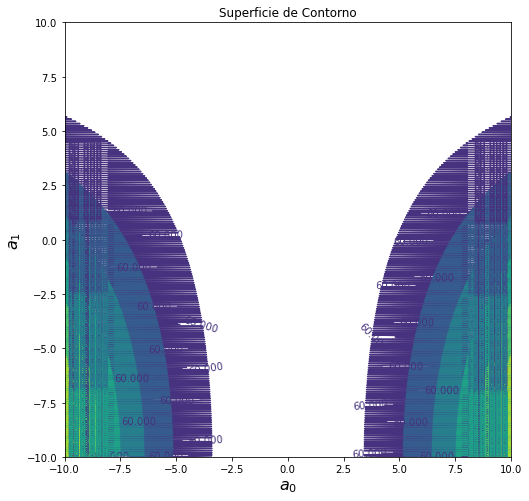

In [18]:
# Plotando a superfície de contorno dos PESOS vs ERRO
fig = plt.figure(figsize=(8, 8))
cp = plt.contour(A1, A2, J)
plt.clabel(cp, inline=1, fontsize=10)
plt.xlabel('$a_0$', fontsize=16)
plt.ylabel('$a_1$', fontsize=16)
plt.title('Superficie de Contorno')
plt.plot(a_opt[0], a_opt[1], c='r', marker='*', markersize=16)
plt.plot(a_hist[0, 0:iteration], a_hist[1, 0:iteration], 'kx')
plt.xticks(np.arange(-10, 10, step=2.0))
plt.yticks(np.arange(-10, 10, step=2.0))
plt.show()